In [16]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [12]:
def load_train_data(path):
    df = pd.read_csv(path)
    X = df.values.copy()
    np.random.shuffle(X)
    X, labels = X[:, 1:-1].astype(np.float32), X[:, -1]
    encoder = LabelEncoder()
    y = encoder.fit_transform(labels).astype(np.int32)
    scaler = StandardScaler()
    X = scaler.fit_transform(X)
    return X, y, encoder, scaler

In [13]:
def load_test_data(path, scaler):
    df = pd.read_csv(path)
    X = df.values.copy()
    X, ids = X[:, 1:].astype(np.float32), X[:, 0].astype(str)
    X = scaler.transform(X)
    return X, ids

In [14]:
def make_submission(clf, X_test, ids, encoder, name='my_neural_net_submission.csv'):
    y_prob = clf.predict_proba(X_test)
    with open(name, 'w') as f:
        f.write('id,')
        f.write(','.join(encoder.classes_))
        f.write('\n')
        for id, probs in zip(ids, y_prob):
            probas = ','.join([id] + map(str, probs.tolist()))
            f.write(probas)
            f.write('\n')
    print("Wrote submission to file {}.".format(name))

In [74]:
def correctRounding(prob):
    return max(min(prob, 1. - 10e-15), 10e-15)

In [93]:
from matplotlib import pyplot
def build_hist(arr, nbins):
    return pyplot.hist(arr, nbins)
%matplotlib inline

In [76]:
from math import log
def loss_func(predictions, actual):
    loss = []
    for item, real_value in zip(predictions, actual):
        loss += [-log(correctRounding(item[real_value]))]
    return np.mean(loss)

##Load Data

In [27]:
X, y, encoder, scaler = load_train_data('train.csv')

In [18]:
X, ids = load_test_data('test.csv', scaler)

In [26]:
from sklearn import datasets
from sklearn import cross_validation

In [28]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, random_state = 42, test_size = 0.1)

#Load Classifiers

In [122]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

_n_trees = 500
_n_estimators = 500

randomForest = RandomForestClassifier(n_jobs=3, n_estimators=_n_estimators,  )
boosting = GradientBoostingClassifier(n_estimators=50)
vector_machine = SVC(probability=True)
knn = KNeighborsClassifier(n_neighbors = 15)

In [79]:
model = randomForest.fit(X_train, y_train)
result = model.predict_proba(X_test)

In [102]:
sum(result[0])

1.0

In [80]:
loss_func(result, y_test)

0.56595258280111793

ImportError: No module named graphlab

In [105]:
boostring_tryout = boosting.fit(X_train, y_train)

In [106]:
boosting_result = boostring_tryout.predict_proba(X_test)
loss_func(boosting_result, y_test)

0.67189894386361326

In [123]:
KNN_tryout = knn.fit(X_train, y_train)

In [121]:
KNN_result = KNN_tryout.predict_proba(X_test)
loss_func(KNN_result, y_test)

2.4140152870439984

In [112]:
import xgboost as xgb
dtrain = xgb.DMatrix(X_train, label = y_train)
param = {}
param['nthread'] = 3
evallist  = [(X_test,'eval'), (X_train,'train')]


(array([ 12.,  18.,  15.,  10.,  12.,   5.,   5.,   2.,   3.,   3.,   0.,
          2.,   2.,   0.,   1.,   0.,   1.,   1.,   0.,   1.]),
 array([ 0.00085979,  0.00313215,  0.00540451,  0.00767687,  0.00994922,
         0.01222158,  0.01449394,  0.0167663 ,  0.01903866,  0.02131102,
         0.02358338,  0.02585573,  0.02812809,  0.03040045,  0.03267281,
         0.03494517,  0.03721753,  0.03948989,  0.04176224,  0.0440346 ,
         0.04630696]),
 <a list of 20 Patch objects>)

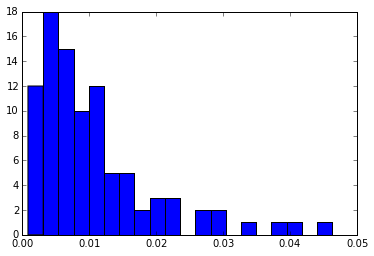

In [94]:
build_hist(model.feature_importances_,20)